In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import accuracy_score
import pickle

In [2]:
data = pd.read_csv("dataset.csv")

In [3]:
data = data.fillna(data.mean())

In [7]:
data.columns

Index(['SUBDIVISION', 'YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC', 'ANNUAL', 'JF', 'MAM', 'JJAS',
       'OND'],
      dtype='object')

In [6]:
data.drop(columns=['Parameter'], inplace = True)

In [13]:
data['SUBDIVISION']

0        ANDAMAN & NICOBAR ISLANDS
1        ANDAMAN & NICOBAR ISLANDS
2        ANDAMAN & NICOBAR ISLANDS
3        ANDAMAN & NICOBAR ISLANDS
4        ANDAMAN & NICOBAR ISLANDS
                   ...            
12451           WEST UTTAR PRADESH
12452           WEST UTTAR PRADESH
12453           WEST UTTAR PRADESH
12454           WEST UTTAR PRADESH
12455           WEST UTTAR PRADESH
Name: SUBDIVISION, Length: 12456, dtype: object

In [14]:
data = data[(data['SUBDIVISION'] == "COASTAL KARNATAKA") | (data['SUBDIVISION'] == "NORTH INTERIOR KARNATAKA") | (data['SUBDIVISION'] == "SOUTH INTERIOR KARNATAKA")]

In [15]:
data.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
2019,COASTAL KARNATAKA,1901-2015,1.9,1.3,6.0,29.7,123.8,842.6,1128.8,707.3,295.6,183.9,63.1,12.6,3396.6,3.2,159.6,2974.3,259.6
2020,COASTAL KARNATAKA,1901-2015,4.3,4.4,16.7,23.7,127.5,191.1,296.1,240.2,149.8,82.5,56.0,24.3,481.0,6.0,127.7,454.7,100.3
2021,COASTAL KARNATAKA,1901-2015,225.4,338.5,278.5,79.7,103.0,22.7,26.2,34.0,50.7,44.8,88.8,192.5,14.2,187.2,80.0,15.3,38.6
2022,COASTAL KARNATAKA,1901,1.8,0.6,10.7,52.4,81.6,960.9,991.2,606.4,108.0,120.5,104.9,17.8,3056.9,2.4,144.7,2666.6,243.3
2023,COASTAL KARNATAKA,1901,-8.4,-53.4,76.9,76.2,-34.1,14.0,-12.2,-14.3,-63.4,-34.5,66.2,41.9,-10.0,-26.1,-9.3,-10.3,-6.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x119a00950>,
      dtype=object)

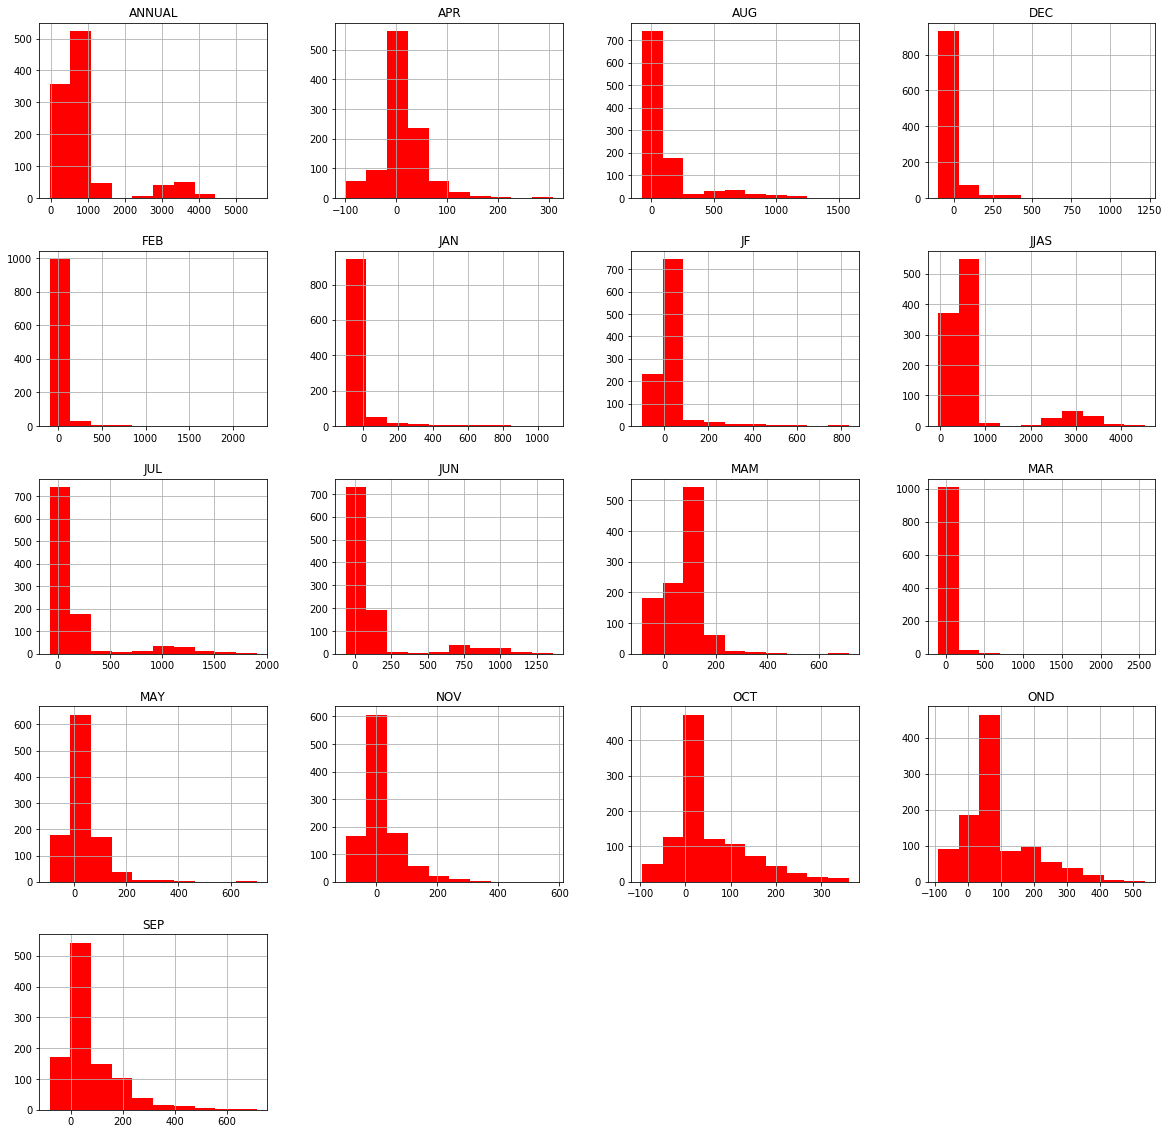

In [17]:
data.hist(figsize=(20,20), color='r')

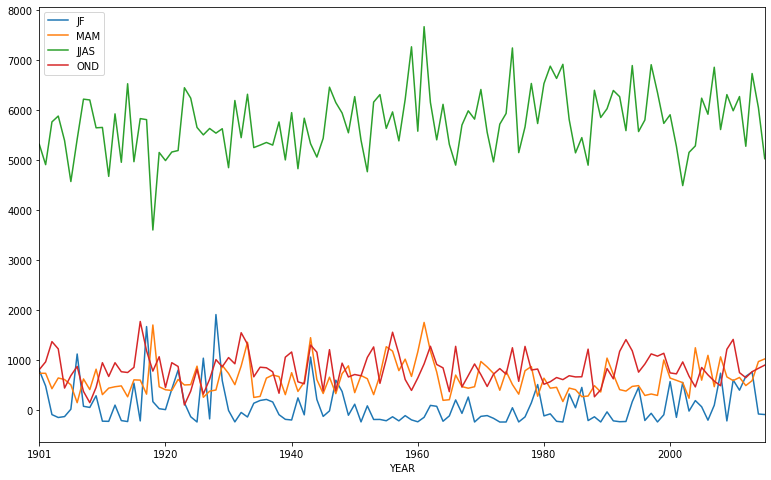

In [18]:
data[['YEAR','JF', 'MAM',
       'JJAS', 'OND']].groupby("YEAR").sum().plot(figsize=(13,8));

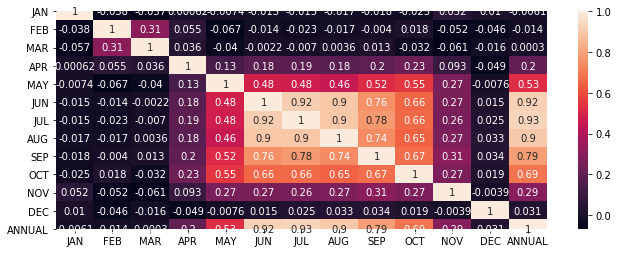

In [19]:
plt.figure(figsize=(11,4))
sns.heatmap(data[['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC','ANNUAL']].corr(),annot=True)
plt.show()

In [22]:
months = data.columns[2:14]
months

Index(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT',
       'NOV', 'DEC'],
      dtype='object')

In [23]:
df1 = data[['SUBDIVISION', months[0], months[1], months[2], months[3]]]

In [24]:
df1

,SUBDIVISION,JAN,FEB,MAR,APR
2019,COASTAL KARNATAKA,1.9,1.3,6.0,29.7
2020,COASTAL KARNATAKA,4.3,4.4,16.7,23.7
2021,COASTAL KARNATAKA,225.4,338.5,278.5,79.7
2022,COASTAL KARNATAKA,1.8,0.6,10.7,52.4
2023,COASTAL KARNATAKA,-8.4,-53.4,76.9,76.2
2024,COASTAL KARNATAKA,3.0,3.0,3.0,3.0
2025,COASTAL KARNATAKA,3.2,0.3,4.9,10.2
2026,COASTAL KARNATAKA,63.8,-75.3,-18.4,-65.7
2027,COASTAL KARNATAKA,3.0,3.0,3.0,3.0
2028,COASTAL KARNATAKA,0.7,0.0,0.0,4.1


In [26]:
df1.columns = np.array(['SUBDIVISION','x1','x2','x3','x4'])

In [27]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1044 entries, 2019 to 9671
Data columns (total 5 columns):
SUBDIVISION    1044 non-null object
x1             1044 non-null float64
x2             1044 non-null float64
x3             1044 non-null float64
x4             1044 non-null float64
dtypes: float64(4), object(1)
memory usage: 48.9+ KB


In [28]:
for k in range(1,9):
    df2 = data[['SUBDIVISION',months[k],months[k+1],months[k+2],months[k+3]]]
    df2.columns = np.array(['SUBDIVISION', 'x1','x2','x3','x4'])
    df1 = df1.append(df2)
df1.index = range(df1.shape[0])

In [29]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9396 entries, 0 to 9395
Data columns (total 5 columns):
SUBDIVISION    9396 non-null object
x1             9396 non-null float64
x2             9396 non-null float64
x3             9396 non-null float64
x4             9396 non-null float64
dtypes: float64(4), object(1)
memory usage: 367.2+ KB


In [30]:
df1.drop('SUBDIVISION', axis=1,inplace=True)

In [31]:
msk = np.random.rand(len(df1)) < 0.8
df_train = df1[msk]
df_test = df1[~msk]

In [32]:
df_train.index = range(df_train.shape[0])
df_test.index = range(df_test.shape[0])

In [33]:
reg = linear_model.LinearRegression()
reg.fit(df_train.drop('x4',axis=1),df_train['x4'])
predicted_values = reg.predict(df_train.drop('x4',axis=1))
residuals = predicted_values-df_train['x4'].values
print('MAD (Training Data): ' + str(np.mean(np.abs(residuals))))

MAD (Training Data): 67.3164728898431


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

division_data = np.asarray(data[['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']])

X = None; y = None
for i in range(division_data.shape[1]-3):
    if X is None:
        X = division_data[:, i:i+3]
        y = division_data[:, i+3]
    else:
        X = np.concatenate((X, division_data[:, i:i+3]), axis=0)
        y = np.concatenate((y, division_data[:, i+3]), axis=0)
        
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [43]:
from sklearn import linear_model

# linear model
reg = linear_model.ElasticNet(alpha=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
pickle_out = open("m2_lr.pickle","wb")
pickle.dump(reg, pickle_out)
pickle_out.close()
print ("Mean Absolute Error: ", mean_absolute_error(y_test, y_pred))


Mean Absolute Error:  72.56562321243311


In [44]:
from sklearn.svm import SVR

# SVM model
clf = SVR(gamma='auto', C=0.1, epsilon=0.2)
clf.fit(X_train, y_train) 
pickle_out = open("m2_svr.pickle","wb")
pickle.dump(clf, pickle_out)
pickle_out.close()
y_pred = clf.predict(X_test)
print(mean_absolute_error(y_test, y_pred))

85.37994353831618


In [45]:
predicted_values = clf.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD SVR (Test Data): ' + str(np.mean(np.abs(residuals))))

MAD SVR (Test Data): 72.97474440010096


In [46]:
predicted_values = reg.predict(df_test.drop('x4',axis=1))
residuals = predicted_values-df_test['x4'].values
print('MAD (Test Data): ' + str(np.mean(np.abs(residuals))))

MAD (Test Data): 65.33372164296325
